In [1]:
import os
os.chdir("/mnt/iusers01/jw01/mdefscs4/ra_challenge/hestia/Hestia_imeche_vision_challenge/NN_recognition_train")

In [2]:
import os
import pandas as pd
import numpy as np
import random
import tensorflow as tf
import tensorflow.keras as k
import glob
from PIL import Image
import argparse
import sys

from dataset.train_generator import retrieve_tf_dataset
# from model.mobile_net import retrieve_mobilenet_model

In [5]:
IMAGE_SIZE = 400

In [4]:
def augment_tf_dataset(tf_data):
    tf_data = tf_data.map((lambda image ,Y: (tf.image.random_contrast(image, 0.8, 1.2), Y)), num_parallel_calls = 6)
    tf_data = tf_data.map((lambda image ,Y: (tf.image.random_brightness(image, 40,), Y)), num_parallel_calls = 6)
    tf_data = tf_data.map((lambda image ,Y: (tf.image.random_saturation(image, 0.8, 1.2), Y)), num_parallel_calls = 6)
    tf_data = tf_data.map((lambda image ,Y: (tf.image.random_hue(image, 0.05), Y)), num_parallel_calls = 6)
    return tf_data

In [5]:
imagenet_localization_train_ds = tf.keras.preprocessing.image_dataset_from_directory("/mnt/iusers01/jw01/mdefscs4/ra_challenge/imagenet/ILSVRC/Data/CLS-LOC/train/",
                                                                              batch_size=32, image_size=(IMAGE_SIZE,IMAGE_SIZE),seed=123,
                                                                              validation_split=0.05, subset="training",)
imagenet_localization_val_ds = tf.keras.preprocessing.image_dataset_from_directory("/mnt/iusers01/jw01/mdefscs4/ra_challenge/imagenet/ILSVRC/Data/CLS-LOC/train/",
                                                                              batch_size=32, image_size=(IMAGE_SIZE,IMAGE_SIZE),seed=123,
                                                                              validation_split=0.05, subset="validation",)

class_names = imagenet_localization_train_ds.class_names


imagenet_localization_train_ds = augment_tf_dataset(imagenet_localization_train_ds)
imagenet_localization_train_ds = imagenet_localization_train_ds.prefetch(buffer_size=200)
imagenet_localization_val_ds = imagenet_localization_val_ds.prefetch(buffer_size=200)

Found 1281167 files belonging to 1000 classes.
Using 1217109 files for training.
Found 1281167 files belonging to 1000 classes.
Using 64058 files for validation.


In [6]:
for images, labels in imagenet_localization_train_ds.take(1):
    pass

In [13]:
np.zeros((3,4)).shape == (3,4)

True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


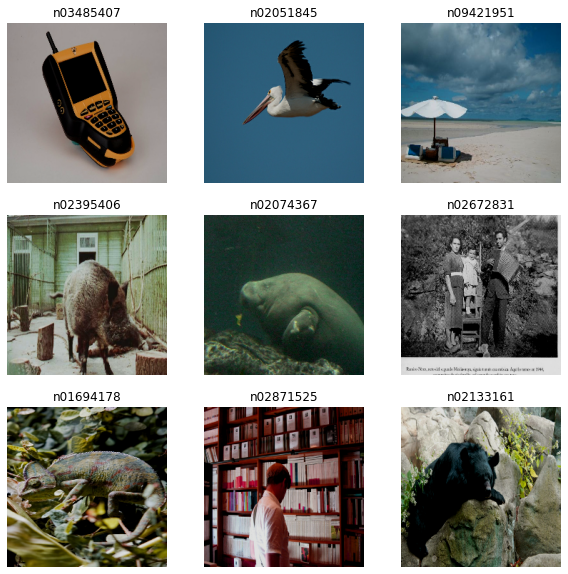

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in imagenet_localization_train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("int"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [33]:
images

<tf.Tensor: shape=(32, 224, 224, 3), dtype=float32, numpy=
array([[[[ 38.80101  ,  49.757042 ,  13.319359 ],
         [ 31.36727  ,  43.5735   ,  16.631676 ],
         [ 38.29804  ,  45.316788 ,  10.070469 ],
         ...,
         [227.92781  , 232.09018  , 227.89766  ],
         [227.92781  , 232.09018  , 227.89766  ],
         [227.92781  , 232.09018  , 227.89766  ]],

        [[ 20.793999 ,  32.024643 ,  11.0302925],
         [ 14.480795 ,  24.828606 ,  12.042663 ],
         [ 16.873505 ,  29.087914 ,  11.397926 ],
         ...,
         [227.92781  , 232.09018  , 227.89766  ],
         [227.92781  , 232.09018  , 227.89766  ],
         [227.92781  , 232.09018  , 227.89766  ]],

        [[ 18.11219  ,  28.40165  ,  11.862972 ],
         [ 17.059553 ,  28.544533 ,  11.465952 ],
         [ 19.79074  ,  33.190453 ,  10.884348 ],
         ...,
         [227.92781  , 232.09018  , 227.89766  ],
         [227.92781  , 232.09018  , 227.89766  ],
         [227.92781  , 232.09018  , 227.89766

In [39]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(12, kernel_size=1, padding='same', activation=None, use_bias=False))
model.add(tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999))
model.add(tf.keras.layers.ReLU(6.))
model.add(tf.keras.layers.DepthwiseConv2D(kernel_size=3, strides = 2, padding='same', activation=None, use_bias=False))
model.add(tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999))
model.add(tf.keras.layers.ReLU(6.))
model.add(tf.keras.layers.Conv2D(24, kernel_size=1, padding='same', activation=None, use_bias=False))
model.add(tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999))
model.add(tf.keras.layers.ReLU(6.))
model.add(tf.keras.layers.DepthwiseConv2D(kernel_size=3, strides = 2, padding='same', activation=None, use_bias=False))
model.add(tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999))
model.add(tf.keras.layers.ReLU(6.))
model.add(tf.keras.layers.Conv2D(48, kernel_size=1, padding='same', activation=None, use_bias=False))
model.add(tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999))
model.add(tf.keras.layers.ReLU(6.))
model.add(tf.keras.layers.DepthwiseConv2D(kernel_size=3, strides = 2, padding='same', activation=None, use_bias=False))
model.add(tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999))
model.add(tf.keras.layers.ReLU(6.))
model.add(tf.keras.layers.Conv2D(96, kernel_size=1, padding='same', activation=None, use_bias=False))
model.add(tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999))
model.add(tf.keras.layers.ReLU(6.))
model.add(tf.keras.layers.DepthwiseConv2D(kernel_size=3, strides = 2, padding='same', activation=None, use_bias=False))
model.add(tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999))
model.add(tf.keras.layers.ReLU(6.))
model.add(tf.keras.layers.Conv2D(48, kernel_size=1, padding='same', activation=None, use_bias=False))
model.add(tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999))
model.add(tf.keras.layers.ReLU(6.))
model.add(tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation=None, use_bias=False))
model.add(tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999))
model.add(tf.keras.layers.ReLU(6.))
model.add(tf.keras.layers.Conv2D(6, kernel_size=1, padding='same', activation=None, use_bias=False))
model.add(tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999))
model.add(tf.keras.layers.ReLU(6.))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1000))
model.add(tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999))
model.add(tf.keras.layers.ReLU(6.))
model.add(tf.keras.layers.Dense(1000, activation = "sigmoid"))

In [40]:
model.build(input_shape = (None,400,400,3))

In [41]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 400, 400, 12)      36        
_________________________________________________________________
batch_normalization_140 (Bat (None, 400, 400, 12)      48        
_________________________________________________________________
re_lu_140 (ReLU)             (None, 400, 400, 12)      0         
_________________________________________________________________
depthwise_conv2d_62 (Depthwi (None, 200, 200, 12)      108       
_________________________________________________________________
batch_normalization_141 (Bat (None, 200, 200, 12)      48        
_________________________________________________________________
re_lu_141 (ReLU)             (None, 200, 200, 12)      0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 200, 200, 24)    

In [3]:
def _inverted_res_block(inputs, filters, expansion, stride,):
    x = inputs
    # expand
    x = tf.keras.layers.Conv2D(filters * expansion, kernel_size=1, padding='same', activation=None, use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999)(x)
    x = tf.keras.layers.ReLU(6.)(x)
    # depthwise conv
    x = tf.keras.layers.DepthwiseConv2D(kernel_size=3, strides = stride, padding='same', activation=None, use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999)(x)
    x = tf.keras.layers.ReLU(6.)(x)
    # project
    x = tf.keras.layers.Conv2D(filters, kernel_size=1, padding='same', activation=None, use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999)(x)
    if stride == 1:
        x = tf.keras.layers.Add()([inputs, x])
        return x
    else:
        return x

In [26]:
def model_to_train():
    inputs = tf.keras.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    x = tf.keras.layers.Conv2D(6, kernel_size=3, padding='same', activation=None, use_bias=False)(inputs)
    x = tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999)(x)
    x = tf.keras.layers.ReLU(6.)(x)
    x = _inverted_res_block(x, filters=10, expansion=3, stride=2,)
    x = _inverted_res_block(x, filters=20, expansion=3, stride=2,)
    x = _inverted_res_block(x, filters=20, expansion=3, stride=1,)
    x = _inverted_res_block(x, filters=80, expansion=3, stride=2,)
    x = _inverted_res_block(x, filters=80, expansion=3, stride=1,)
    x = _inverted_res_block(x, filters=80, expansion=3, stride=1,)
    x = _inverted_res_block(x, filters=40, expansion=3, stride=2,)
    x = _inverted_res_block(x, filters=40, expansion=3, stride=1,)
    x = _inverted_res_block(x, filters=40, expansion=3, stride=1,)
    x = _inverted_res_block(x, filters=6, expansion=3, stride=2,)
    x = _inverted_res_block(x, filters=6, expansion=3, stride=1,)
    # x = tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999)(x) # because last block ends with a batchnorm
    x = tf.keras.layers.ReLU(6.)(x)

    model = tf.keras.Model(inputs, x)

    return model

In [27]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

base_model = model_to_train()

inputs = tf.keras.Input(shape=(400, 400, 3))
x = preprocess_input(inputs)
x = base_model(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1000, activation = None, use_bias=False)(x)
x = tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999)(x)
x = tf.keras.layers.ReLU(6.)(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1000, activation = "sigmoid", use_bias=True)(x)

model = tf.keras.Model(inputs, x)

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0003),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy()])

model.save(f'weights/non_trained_mobilenet_faster.tf', save_format = "tf")

INFO:tensorflow:Assets written to: weights/non_trained_mobilenet_faster.tf/assets


In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
    base_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),
                                               include_top=False,
                                               weights='imagenet')

In [29]:
model.layers[3].summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 400, 400, 3) 0                                            
__________________________________________________________________________________________________
conv2d_140 (Conv2D)             (None, 400, 400, 6)  162         input_14[0][0]                   
__________________________________________________________________________________________________
batch_normalization_211 (BatchN (None, 400, 400, 6)  24          conv2d_140[0][0]                 
__________________________________________________________________________________________________
re_lu_150 (ReLU)                (None, 400, 400, 6)  0           batch_normalization_211[0][0]    
___________________________________________________________________________________________

In [ ]:
import tensorflow as tf
import tensorflow.keras as k
import os
import pandas as pd
import numpy as np
import random

tf.config.threading.set_intra_op_parallelism_threads(10)
tf.config.threading.set_inter_op_parallelism_threads(10)

IMAGE_SIZE = 400

name = "test_mobilenet"
def model_to_train():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(12, kernel_size=1, padding='same', activation=None, use_bias=False))
    model.add(tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999))
    model.add(tf.keras.layers.ReLU(6.))
    model.add(tf.keras.layers.DepthwiseConv2D(kernel_size=3, strides = 2, padding='same', activation=None, use_bias=False))
    model.add(tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999))
    model.add(tf.keras.layers.ReLU(6.))
    model.add(tf.keras.layers.Conv2D(24, kernel_size=1, padding='same', activation=None, use_bias=False))
    model.add(tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999))
    model.add(tf.keras.layers.ReLU(6.))
    model.add(tf.keras.layers.DepthwiseConv2D(kernel_size=3, strides = 2, padding='same', activation=None, use_bias=False))
    model.add(tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999))
    model.add(tf.keras.layers.ReLU(6.))
    model.add(tf.keras.layers.Conv2D(48, kernel_size=1, padding='same', activation=None, use_bias=False))
    model.add(tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999))
    model.add(tf.keras.layers.ReLU(6.))
    model.add(tf.keras.layers.DepthwiseConv2D(kernel_size=3, strides = 2, padding='same', activation=None, use_bias=False))
    model.add(tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999))
    model.add(tf.keras.layers.ReLU(6.))
    model.add(tf.keras.layers.Conv2D(96, kernel_size=1, padding='same', activation=None, use_bias=False))
    model.add(tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999))
    model.add(tf.keras.layers.ReLU(6.))
    model.add(tf.keras.layers.DepthwiseConv2D(kernel_size=3, strides = 2, padding='same', activation=None, use_bias=False))
    model.add(tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999))
    model.add(tf.keras.layers.ReLU(6.))
    model.add(tf.keras.layers.Conv2D(48, kernel_size=1, padding='same', activation=None, use_bias=False))
    model.add(tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999))
    model.add(tf.keras.layers.ReLU(6.))
    model.add(tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation=None, use_bias=False))
    model.add(tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999))
    model.add(tf.keras.layers.ReLU(6.))
    model.add(tf.keras.layers.Conv2D(6, kernel_size=1, padding='same', activation=None, use_bias=False))
    model.add(tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999))
    model.add(tf.keras.layers.ReLU(6.))

    return model

def augment_tf_dataset(tf_data):
    tf_data = tf_data.map((lambda image ,Y: (tf.image.random_contrast(image, 0.8, 1.2), Y)), num_parallel_calls = 6)
    tf_data = tf_data.map((lambda image ,Y: (tf.image.random_brightness(image, 40,), Y)), num_parallel_calls = 6)
    tf_data = tf_data.map((lambda image ,Y: (tf.image.random_saturation(image, 0.8, 1.2), Y)), num_parallel_calls = 6)
    tf_data = tf_data.map((lambda image ,Y: (tf.image.random_hue(image, 0.05), Y)), num_parallel_calls = 6)
    return tf_data

imagenet_localization_train_ds = tf.keras.preprocessing.image_dataset_from_directory("/mnt/iusers01/jw01/mdefscs4/ra_challenge/imagenet/ILSVRC/Data/CLS-LOC/train/",
                                                                              batch_size=32, image_size=(IMAGE_SIZE,IMAGE_SIZE),seed=123,
                                                                              validation_split=0.05, subset="training",)
imagenet_localization_val_ds = tf.keras.preprocessing.image_dataset_from_directory("/mnt/iusers01/jw01/mdefscs4/ra_challenge/imagenet/ILSVRC/Data/CLS-LOC/train/",
                                                                              batch_size=32, image_size=(IMAGE_SIZE,IMAGE_SIZE),seed=123,
                                                                              validation_split=0.05, subset="validation",)

class_names = imagenet_localization_train_ds.class_names

imagenet_localization_train_ds = imagenet_localization_train_ds.cache("/mnt/iusers01/jw01/mdefscs4/localscratch/imagenet_cache.tfdata")
imagenet_localization_train_ds = augment_tf_dataset(imagenet_localization_train_ds)
imagenet_localization_train_ds = imagenet_localization_train_ds.prefetch(buffer_size=200)
imagenet_localization_val_ds = imagenet_localization_val_ds.prefetch(buffer_size=200)

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

base_model = model_to_train()

inputs = tf.keras.Input(shape=(400, 400, 3))
x = preprocess_input(inputs)
x = base_model(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1000, activation = None, use_bias=False)(x)
x = tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999)(x)
x = tf.keras.layers.ReLU(6.)(x)
x = tf.keras.layers.Dense(1000, activation = "sigmoid", use_bias=True)(x)

model = tf.keras.Model(inputs, x)

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0003),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy()])

model.fit(imagenet_localization_train_ds, validation_data = imagenet_localization_val_ds,
    epochs = 10, verbose = 2,)

model.save(f'weights/{name}.tf', save_format = "tf")

In [2]:
import tensorflow as tf
import tensorflow.keras as k
import os
import pandas as pd
import numpy as np
import random

tf.config.threading.set_intra_op_parallelism_threads(10)
tf.config.threading.set_inter_op_parallelism_threads(10)

IMAGE_SIZE = 400

name = "test_mobilenet_resblocks"

def _inverted_res_block(inputs, filters, expansion, stride,):
    x = inputs
    # expand
    x = tf.keras.layers.Conv2D(filters * expansion, kernel_size=1, padding='same', activation=None, use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999)(x)
    x = tf.keras.layers.ReLU(6.)(x)
    # depthwise conv
    x = tf.keras.layers.DepthwiseConv2D(kernel_size=3, strides = stride, padding='same', activation=None, use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999)(x)
    x = tf.keras.layers.ReLU(6.)(x)
    # project
    x = tf.keras.layers.Conv2D(filters, kernel_size=1, padding='same', activation=None, use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999)(x)
    if stride == 1:
        x = tf.keras.layers.Add()([inputs, x])
        return x
    else:
        return x

def model_to_train():
    inputs = tf.keras.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    x = tf.keras.layers.Conv2D(10, kernel_size=3, padding='same', activation=None, use_bias=False)(inputs)
    x = tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999)(x)
    x = tf.keras.layers.ReLU(6.)(x)
    x = _inverted_res_block(x, filters=10, expansion=1, stride=1,)
    x = _inverted_res_block(x, filters=20, expansion=6, stride=2,)
    x = _inverted_res_block(x, filters=20, expansion=6, stride=1,)
    x = _inverted_res_block(x, filters=40, expansion=6, stride=2,)
    x = _inverted_res_block(x, filters=40, expansion=6, stride=1,)
    x = _inverted_res_block(x, filters=80, expansion=6, stride=2,)
    x = _inverted_res_block(x, filters=80, expansion=6, stride=1,)
    x = _inverted_res_block(x, filters=6, expansion=6, stride=2,)
    x = tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999)(x)
    x = tf.keras.layers.ReLU(6.)(x)

    model = tf.keras.Model(inputs, x)

    return model

def augment_tf_dataset(tf_data):
    tf_data = tf_data.map((lambda image ,Y: (tf.image.random_contrast(image, 0.8, 1.2), Y)), num_parallel_calls = 6)
    tf_data = tf_data.map((lambda image ,Y: (tf.image.random_brightness(image, 40,), Y)), num_parallel_calls = 6)
    tf_data = tf_data.map((lambda image ,Y: (tf.image.random_saturation(image, 0.8, 1.2), Y)), num_parallel_calls = 6)
    tf_data = tf_data.map((lambda image ,Y: (tf.image.random_hue(image, 0.05), Y)), num_parallel_calls = 6)
    return tf_data

imagenet_localization_train_ds = tf.keras.preprocessing.image_dataset_from_directory("/mnt/iusers01/jw01/mdefscs4/ra_challenge/imagenet/ILSVRC/Data/CLS-LOC/train/",
                                                                              batch_size=32, image_size=(IMAGE_SIZE,IMAGE_SIZE),seed=123,
                                                                              validation_split=0.05, subset="training",)
imagenet_localization_val_ds = tf.keras.preprocessing.image_dataset_from_directory("/mnt/iusers01/jw01/mdefscs4/ra_challenge/imagenet/ILSVRC/Data/CLS-LOC/train/",
                                                                              batch_size=32, image_size=(IMAGE_SIZE,IMAGE_SIZE),seed=123,
                                                                              validation_split=0.05, subset="validation",)

class_names = imagenet_localization_train_ds.class_names

imagenet_localization_train_ds = imagenet_localization_train_ds.cache("/mnt/iusers01/jw01/mdefscs4/localscratch/imagenet_cache.tfdata")
imagenet_localization_train_ds = augment_tf_dataset(imagenet_localization_train_ds)
imagenet_localization_train_ds = imagenet_localization_train_ds.prefetch(buffer_size=200)
imagenet_localization_val_ds = imagenet_localization_val_ds.prefetch(buffer_size=200)

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

base_model = model_to_train()

inputs = tf.keras.Input(shape=(400, 400, 3))
x = preprocess_input(inputs)
x = base_model(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1000, activation = None, use_bias=False)(x)
x = tf.keras.layers.BatchNormalization(epsilon=1e-3,momentum=0.999)(x)
x = tf.keras.layers.ReLU(6.)(x)
x = tf.keras.layers.Dense(1000, activation = "sigmoid", use_bias=True)(x)

model = tf.keras.Model(inputs, x)

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0003),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy()])

model.fit(imagenet_localization_train_ds, validation_data = imagenet_localization_val_ds,
    epochs = 10, verbose = 2,)

model.save(f'weights/{name}.tf', save_format = "tf")

Found 1281167 files belonging to 1000 classes.
Using 1217109 files for training.
Found 1281167 files belonging to 1000 classes.
Using 64058 files for validation.
Epoch 1/10
    9/38035 [..............................] - ETA: 211:03:44 - loss: 7.1505 - accuracy: 0.0000e+00 - top_k_categorical_accuracy: 0.0000e+00

KeyboardInterrupt: 